In [219]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

In [155]:
import seaborn as sns

In [157]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

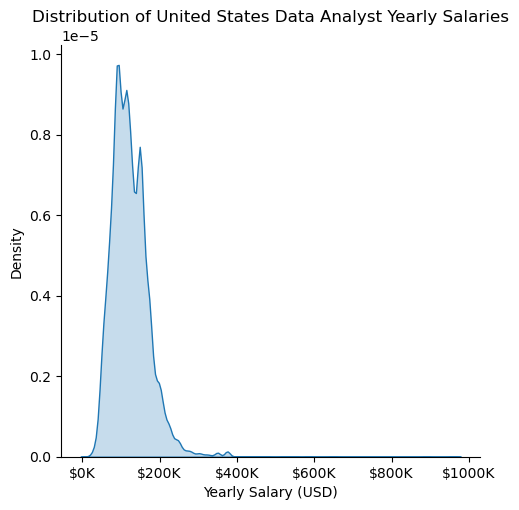

In [162]:
sns.displot(df['salary_year_avg'], kind='kde', fill=True, common_norm=False)
# df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

In [163]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

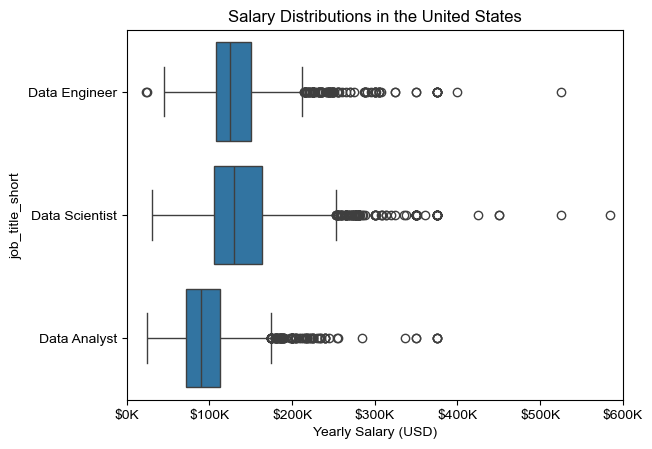

In [166]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')
# plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [167]:
df_DA_US = df_DA_US.explode('job_skills')


In [168]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [169]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


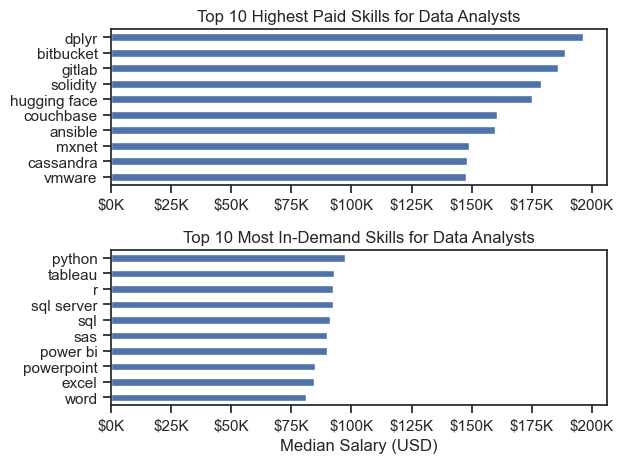

In [170]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

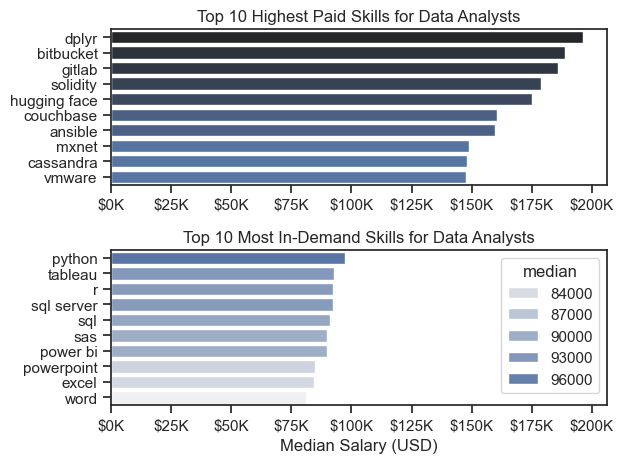

In [177]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[0].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

# Problems

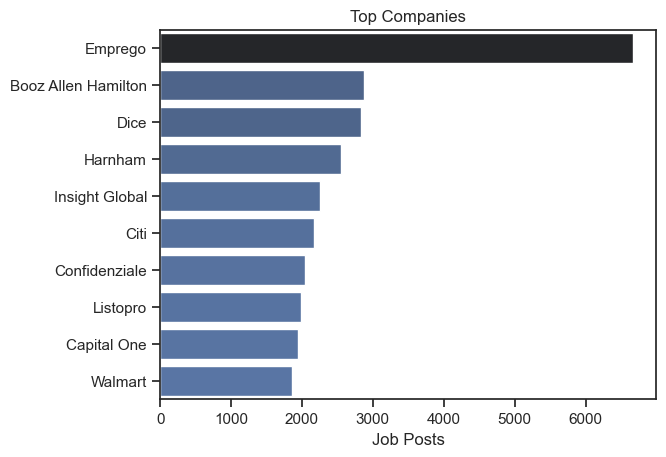

In [206]:
# Top Companies Bar Plot
top_companies = df.groupby('company_name').agg(job_posts = ('company_name', 'size')).sort_values(by='job_posts', ascending=False).head(10)

sns.barplot(data=top_companies, x='job_posts', y=top_companies.index, hue='job_posts', palette='dark:b_r')
plt.title('Top Companies')
plt.ylabel('')
plt.xlabel('Job Posts')
plt.legend().set_visible(False)
plt.show()

In [208]:
# Data Scientist Salary Histogram
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

df_DS = df_DS.dropna(subset=['salary_year_avg'])

df_DS

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"[gdpr, excel]","{'analyst_tools': ['excel'], 'libraries': ['gd..."
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
212,Data Scientist,NATOIS-0008 Data Scientist (NS) - TUE 13 Jun,"Brussels, Belgium",via Ai-Jobs.net,Full-time,False,Belgium,2023-06-05 13:56:28,False,False,Belgium,year,157500.0,NaN,"EMW, Inc.","[c, r, sql, python, aws, azure, hadoop, tableau]","{'analyst_tools': ['tableau'], 'cloud': ['aws'..."
257,Data Scientist,Senior Bioinformatics Research Scientist- Data...,"Brighton, TN",via Work RN,Full-time,False,Georgia,2023-11-20 13:40:09,False,False,United States,year,103128.0,NaN,St. Jude Children's Research Hospital,"[r, electron]","{'libraries': ['electron'], 'programming': ['r']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785488,Data Scientist,Data Scientist,"New York, NY",via BeBee,Full-time,False,"New York, United States",2023-11-27 06:01:23,False,False,United States,year,115000.0,NaN,Winston Fox,"[python, r]","{'programming': ['python', 'r']}"
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"[python, hadoop, spark, airflow, kubernetes]","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


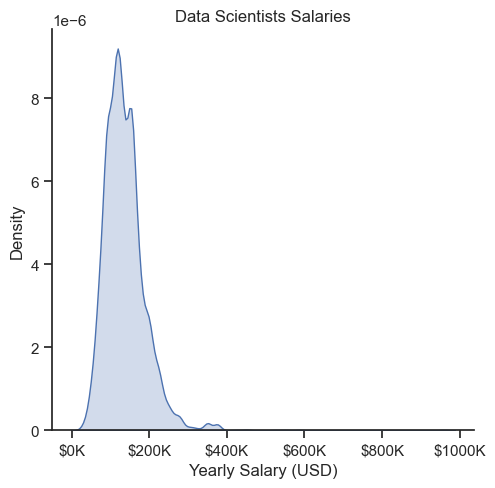

In [209]:
sns.displot(df_DS['salary_year_avg'], kind='kde', fill=True, common_norm=False)

plt.title('Data Scientists Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

In [212]:
# Data Roles Salary Box Plot
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_copy = df[df['job_title_short'].isin(job_titles)].dropna(subset=['salary_year_avg'])

job_list = [df_copy[df_copy['job_title_short'] == 'job_title']['salary_year_avg'] for job_title in job_titles]


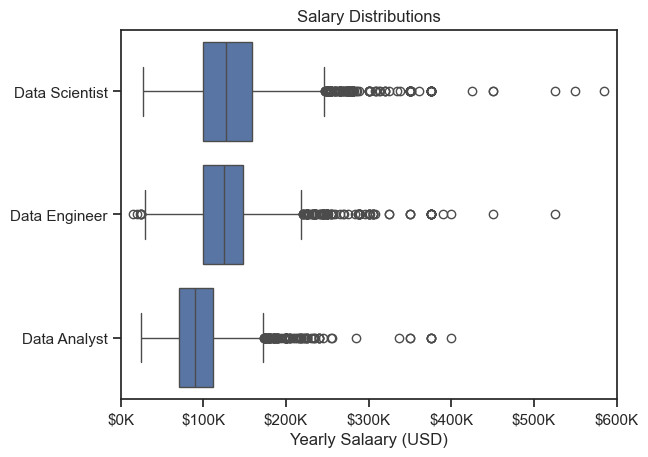

In [215]:
sns.boxplot(data=df_copy, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

plt.title('Salary Distributions')
plt.xlabel('Yearly Salaary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()

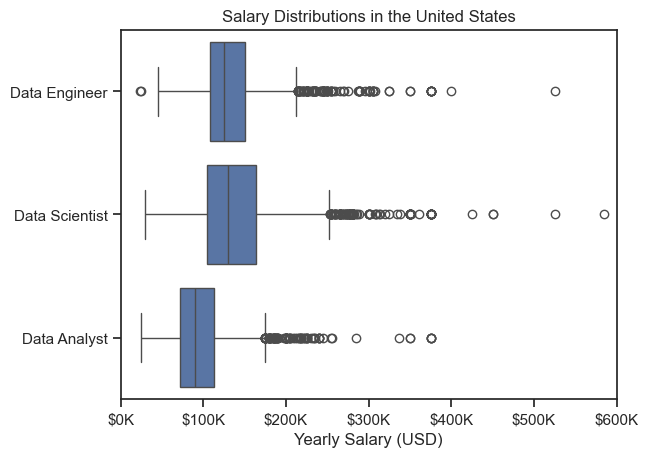

In [218]:
# Salary Distributions for United States
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_copy = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

job_list = [df_copy[df_copy['job_title_short'] == 'job_title']['salary_year_avg'] for job_title in job_titles]

sns.boxplot(data=df_copy, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()